<a href="https://colab.research.google.com/github/SethSekyere/SethMLClass/blob/main/Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##Machine Learning Engineering
##  Homework 2
## Seth Obimpeh Sekyere
##RIN:662055184



##Problem 1


In [9]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Defining two new features based on the original four features
# We Take the sum and the product of the first two features to produce the new features 1 and 2
new_feature1 = X[:, 0] + X[:, 1]
new_feature2 = X[:, 0] * X[:, 1]

# stacking the new features with the original features
X_new = np.column_stack((new_feature1, new_feature2))

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.4, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train an SVM classifier using the new features
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8166666666666667


## From the above, we can see that the accuracy score of the classification is 81.67%

##Problem 2

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Accuracy: 0.9892504357931435


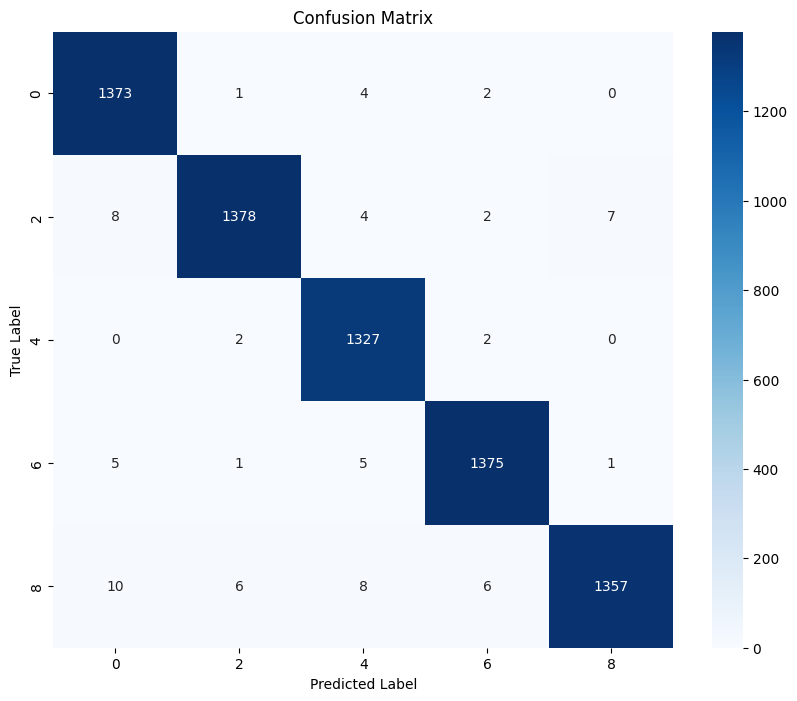

Correctly classified 6's: 1375


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

# Extract even-numbered digits
X = mnist.data
y = mnist.target.astype(int)
X_even = X[y % 2 == 0]
y_even = y[y % 2 == 0]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_even, y_even, test_size=0.2, random_state=42)

# Train KNN classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_even), yticklabels=np.unique(y_even))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Count correctly classified 6's
correct_6s = np.sum((y_test == 6) & (y_pred == 6))
print("Correctly classified 6's:", correct_6s)


##From the code, the correctly classified 6's are 1375

No, we cannot directly use pairplot to visualize the MNIST dataset because pairplot is primarily designed for visualizing relationships between continuous variables in a dataset.

MNIST dataset consists of images, where each image represents a handwritten digit. Each pixel in the image is a feature, making it a high-dimensional dataset. Pairplot is not suitable for visualizing such high-dimensional data directly.



##Problem 3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


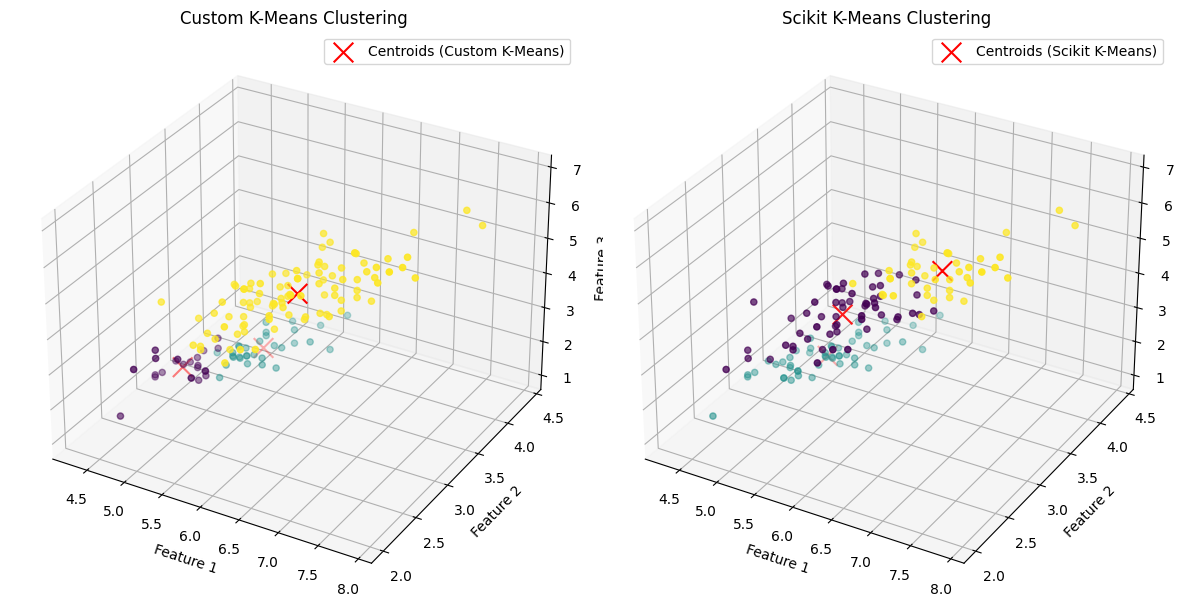

Silhouette Score (Custom K-Means): 0.5285663378573879
Silhouette Score (Scikit K-Means): 0.5498955809838528


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :3]  # Selecting three features

# Custom k-means algorithm
class MyKMeans:
    def __init__(self, n_clusters, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X):
        # Initialize centroids randomly
        centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]

        for _ in range(self.max_iter):
            # Assign each data point to the nearest centroid
            labels = np.argmin(np.linalg.norm(X[:, None] - centroids, axis=-1), axis=1)

            # Update centroids
            new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(self.n_clusters)])

            # Check for convergence
            if np.allclose(centroids, new_centroids):
                break

            centroids = new_centroids

        self.labels_ = labels
        self.cluster_centers_ = centroids

# Custom k-means clustering
my_kmeans = MyKMeans(n_clusters=3)
my_kmeans.fit(X)

# Scikit-learn k-means clustering
sk_kmeans = KMeans(n_clusters=3)
sk_kmeans.fit(X)

# Visualize clusters using a 3D scatter plot
fig = plt.figure(figsize=(12, 6))

# Plot clusters from custom k-means
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=my_kmeans.labels_, cmap='viridis')
ax1.scatter(my_kmeans.cluster_centers_[:, 0], my_kmeans.cluster_centers_[:, 1], my_kmeans.cluster_centers_[:, 2],
            c='red', marker='x', s=200, label='Centroids (Custom K-Means)')
ax1.set_title('Custom K-Means Clustering')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_zlabel('Feature 3')
ax1.legend()

# Plot clusters from scikit-learn k-means
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X[:, 0], X[:, 1], X[:, 2], c=sk_kmeans.labels_, cmap='viridis')
ax2.scatter(sk_kmeans.cluster_centers_[:, 0], sk_kmeans.cluster_centers_[:, 1], sk_kmeans.cluster_centers_[:, 2],
            c='red', marker='x', s=200, label='Centroids (Scikit K-Means)')
ax2.set_title('Scikit K-Means Clustering')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.set_zlabel('Feature 3')
ax2.legend()

plt.tight_layout()
plt.show()

# Evaluate clustering performance using silhouette score
silhouette_custom = silhouette_score(X, my_kmeans.labels_)
silhouette_sklearn = silhouette_score(X, sk_kmeans.labels_)

print(f"Silhouette Score (Custom K-Means): {silhouette_custom}")
print(f"Silhouette Score (Scikit K-Means): {silhouette_sklearn}")


## In Increasing the number of clusters  the code will identify more outliers.
##More clusters will also lead to finer-grained clustering, while reducing the number of clusters may merge some clusters together. the algorithm may identify finer-grained patterns in the data, potentially assigning outliers to smaller, more specialized clusters.
## Also If the number of clusters is too high relative to the complexity of the data, the algorithm may overfit, creating clusters that capture noise rather than meaningful patterns. And adding more clusters might lead to denser clusters, making it easier to identify outliers as data points that are far from the cluster centers